# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mutsaqoful Izah Yumna]
- **Email:** [m004b4kx3169@bangkit.academy]
- **ID Dicoding:** [mizyumna]

# Defining Business Questions

- Question 1: Which month has the highest and lowest number of users?
- Question 2: How is the distribution of casual and registered users in each season?
- Question 3: Is there a difference in user behavior based on the time of service usage?


# Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Wrangling

## Gathering Data

In [46]:
!git clone https://github.com/Nanashua/Proyek-Analisis-Data-Dicoding.git

fatal: destination path 'Proyek-Analisis-Data-Dicoding' already exists and is not an empty directory.


In [47]:
hour_df = pd.read_csv('Proyek-Analisis-Data-Dicoding/Bike-sharing-dataset/hour.csv')
day_df = pd.read_csv('Proyek-Analisis-Data-Dicoding/Bike-sharing-dataset/day.csv')

In [48]:
# Menampilkan nama-nama kolom di hour_df
print(hour_df.columns)

# Menampilkan nama-nama kolom di hour_df
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Insight:**
- Cloning Repository:
  - Langkah ini memungkinkan Anda untuk memiliki salinan lokal dari data yang dibutuhkan untuk analisis lebih lanjut.
- Membaca Data CSV:
  - Dua dataset yang berbeda diimpor ke dalam lingkungan kerja menggunakan pd.read_csv().
  - hour_df memuat data penyewaan sepeda berdasarkan jam, yang memungkinkan analisis perilaku pengguna dalam rentang waktu yang lebih detail.
  - day_df memuat data penyewaan sepeda berdasarkan hari, yang memungkinkan analisis tren harian.
- Struktur Data:
  - hour_df: Instant, Datetime, Season, Year, Month, Hour, Holiday, Weekday, Workingday, Weathersit, Temp, Atemp, Humidity, Windspeed, Casual, Registered, Count.
  - day_df: Instant, Season, Year, Month, Holiday, Weekday, Workingday, Weathersit, Temp, Atemp, Humidity, Windspeed, Casual, Registered, Count.

## Assessing Data

### Hour

In [49]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Missing Value**

In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
hour_df.isna().sum()
# Kode di atas akan menampilkan jumlah missing values yang terdapat dalam setiap kolom

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0




---

**Duplicate Data**

In [52]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Data duplikat merujuk pada baris-baris dalam dataset yang
# memiliki nilai yang sama di semua kolom (atau di kolom-kolom tertentu)

Jumlah duplikasi:  0




---

**Statistic Parameters**

status : tidak ada kesalahan

In [53]:
# Generate descriptive statistic for dataset hour.csv
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Day

In [54]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Missing Value**

In [55]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [56]:
day_df.isna().sum()
# Kode di atas akan menampilkan jumlah missing values yang terdapat dalam setiap kolom

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0




---

**Duplicate Data**

In [57]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Data duplikat merujuk pada baris-baris dalam dataset yang
# memiliki nilai yang sama di semua kolom (atau di kolom-kolom tertentu)

Jumlah duplikasi:  0




---

**Statistic Parameters**

status : tidak ada kesalahan

In [58]:
# parameter statistika
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Insight:**

**Dataset Hour**
- Missing Values: Tidak ada nilai hilang di dataset.
- Data Type : dteday ke type datetime
- Duplicate Data: Tidak ada entri duplikat.
- Statistik Deskriptif:
  - Variasi tinggi di casual, registered, dan cnt.
  - Rata-rata pengguna terdaftar (886) lebih tinggi daripada pengguna kasual (367).

**Dataset Day**
- Missing Values: Tidak ada nilai hilang di dataset; semua kolom memiliki 731 entri non-null.
- Data Type : dteday ke type datetime
- Duplicate Data:Tidak ada duplikasi
- Statistik Deskriptif:
- Rata-rata pengguna:
  - casual: 848
  - registered: 3656
  - cnt: 4504
- Variasi: Standar deviasi tinggi untuk casual (686) dan registered (1560), menunjukkan variasi yang signifikan dalam jumlah pengguna.
- Min dan Max:Jumlah pengguna (cnt) bervariasi dari 22 hingga 8714, menunjukkan adanya hari dengan sedikit dan banyak pengguna.

## Cleaning Data

### hour_df

In [59]:
# Step 1: Define a dictionary to rename specific columns with descriptive names
column_rename_map = {
    'yr': 'Year',
    'mnth': 'Month',
    'hum': 'Humidity',
    'cnt': 'Count',
    'dteday': 'Datetime',
    'hr': 'Hour' }
hour_df = hour_df.rename(columns=column_rename_map)

# Step 2: Capitalize all column names in a more readable format
hour_df.columns = [name.capitalize() for name in hour_df.columns]

# Step 3: Convert 'Datetime' to datetime format
hour_df['Datetime'] = pd.to_datetime(hour_df['Datetime'], format='%Y-%m-%d')

# Step 4: Set 'Datetime' as the index for time-based operations
hour_df = hour_df.set_index('Datetime')

# Step 3: Display the entire dataset after changesa
hour_df.sample(frac=1).reset_index(drop=True)  # Randomly shuffle the data for uniqueness


,Instant,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,2855,2,0,5,20,0,2,1,1,0.66,0.6212,0.61,0.1940,28,262,290
1,12323,2,1,6,15,0,6,0,1,0.64,0.6212,0.38,0.2537,297,405,702
2,4245,3,0,6,18,0,4,1,1,0.76,0.6667,0.29,0.2537,114,472,586
3,12068,2,1,5,0,0,3,1,1,0.62,0.5909,0.78,0.1343,19,28,47
4,14821,3,1,9,17,0,5,1,1,0.72,0.6667,0.51,0.1940,137,757,894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,13264,3,1,7,20,0,3,1,1,0.74,0.6667,0.51,0.1642,73,410,483
17375,9364,1,1,1,1,0,2,1,1,0.30,0.2727,0.42,0.2985,1,7,8
17376,10172,1,1,3,21,0,0,0,1,0.28,0.2727,0.36,0.2239,9,70,79
17377,8196,4,0,12,3,0,2,1,1,0.18,0.2424,0.80,0.0000,0,3,3


### day_df

In [60]:
# Step 1: Rename the selected columns with clearer names
columns_map = {
    'yr': 'Year',
    'mnth': 'Month',
    'hum': 'Humidity',
    'cnt': 'Count',
    'dteday': 'Datetime' }
day_df = day_df.rename(columns=columns_map)

# Step 2: Ensure all column names are properly capitalizeda
day_df.columns = [col.capitalize() for col in day_df.columns]

# Step 3: Convert 'Datetime' to datetime format
day_df['Datetime'] = pd.to_datetime(day_df['Datetime'], format='%Y-%m-%d')

# Step 4: Set 'Datetime' as the index for time-based operations
day_df = day_df.set_index('Datetime')

# Step 5: Display the updated DataFrame with a sample of all rows
day_df.sample(n=len(day_df))  # Show a shuffled view of the entire dataset for uniqueness


,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
Datetime,,,,,,,,,,,,,,,
2011-08-04,216,3,0,8,0,4,1,2,0.710000,0.664788,0.757500,0.197150,799,3777,4576
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2012-06-10,527,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224,4374,6598
2012-03-20,445,1,1,3,0,2,1,1,0.560833,0.538533,0.807917,0.121271,1051,5042,6093
2011-07-23,204,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-07,554,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
2011-04-20,110,2,0,4,0,3,1,1,0.595000,0.564392,0.614167,0.241925,613,3331,3944
2012-05-31,517,2,1,5,0,4,1,1,0.680000,0.631329,0.492917,0.195279,1100,6238,7338


### Insight

- Nama Kolom: Kolom diubah menjadi nama yang lebih deskriptif.
  - 'yr': 'Year',
  - 'mnth': 'Month',
  - 'hum': 'Humidity',
  - 'cnt': 'Count',
  - 'dteday': 'Datetime',
  - 'hr': 'Hour'
- Format Kolom: Semua nama kolom menggunakan huruf kapital di awal untuk keterbacaan.
- Tipe Data: Kolom Datetime dikonversi ke format datetime untuk analisis berbasis waktu.
- Pengacakan Data: Dataset diacak untuk variasi dalam analisis.

# Exploratory Data Analysis (EDA)

## Explore day_df

### Distribusi Pengguna per Hari dalam seminggu

In [61]:
# Distribusi total pengguna kasual dan terdaftar per hari dalam seminggu (Weekday)
daily_usage = day_df.groupby('Weekday')[['Casual', 'Registered']].sum()
print(daily_usage)

         Casual  Registered
Weekday                    
0        140521      303506
1         70784      384719
2         57843      411266
3         57319      415729
4         61460      423935
5         78238      409552
6        153852      323955


### Distribusi Pengguna per Musim



---

**Season**

Seasons Dictionary:

1 : Spring

2 : Summer

3 : Fall

4 : Winter

In [62]:
# Group by 'Season' and sum the 'Count' column, then sort in descending order
day_df.groupby('Season')['Count'].sum().nlargest(4).reset_index()

,Season,Count
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


### Distribusi Pengguna per Bulan



---

**Count**

Note:
This analysis helps identify which months have the highest and lowest user counts.
- regarding resource allocation and service optimization during peak times. August (Month 8)
- shows the highest usage, suggesting a possible link to summer or holiday seasons, while January (Month 1)
- reflects the lowest usage, which could be due to colder weather or fewer outdoor activities.


In [63]:
# Displays the number of users
day_df.groupby(by="Month").Count.sum().sort_values(ascending=False).reset_index().head(len(day_df))

,Month,Count
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


### Distribusi Pengguna Tahunan



---

**Year**

In [64]:
# Displays casual and registered users by year
day_df.groupby(by="Year").agg({"Registered": "sum","Casual": "sum"})

,Registered,Casual
Year,,
0,995851,247252
1,1676811,372765


Year Dictionary:

0 : 2011

1 : 2012

### Korelasi Cuaca dengan user

In [65]:
# Korelasi antara variabel cuaca dan jumlah pengguna
corr_day = day_df[['Temp', 'Atemp', 'Humidity', 'Windspeed', 'Count']].corr()
print(corr_day)

               Temp     Atemp  Humidity  Windspeed     Count
Temp       1.000000  0.991702  0.126963  -0.157944  0.627494
Atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
Humidity   0.126963  0.139988  1.000000  -0.248489 -0.100659
Windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
Count      0.627494  0.631066 -0.100659  -0.234545  1.000000


- Korelasi lemah: 0.0 – 0.3 (atau -0.3 – 0.0)
- Korelasi sedang: 0.3 – 0.7 (atau -0.7 – -0.3)
- Korelasi kuat: 0.7 – 1.0 (atau -1.0 – -0.7)

## Explore hour_df

### Distribusi Pengguna per Hari dalam seminggu

In [66]:
# Distribusi total pengguna kasual dan terdaftar per hari dalam seminggu (Weekday)
daily_usage = hour_df.groupby('Weekday')[['Casual', 'Registered']].sum()
print(daily_usage)

         Casual  Registered
Weekday                    
0        140521      303506
1         70784      384719
2         57843      411266
3         57319      415729
4         61460      423935
5         78238      409552
6        153852      323955


### Distribusi Pengguna per Musim



---

**Season**

Seasons Dictionary:

1 : Spring

2 : Summer

3 : Fall

4 : Winter

In [67]:
# Group by 'Season' and sum the 'Count' column, then sort in descending order
hour_df.groupby('Season')['Count'].sum().nlargest(4).reset_index()

,Season,Count
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


### Distribusi Pengguna per Bulan

In [68]:
# Displays the number of users
hour_df.groupby(by="Month").Count.sum().sort_values(ascending=False).reset_index().head(len(hour_df))

,Month,Count
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


### Distribusi Pengguna Tahunan



---

**Year**

In [69]:
# Displays casual and registered users by year
hour_df.groupby(by="Year").agg({"Registered": "sum","Casual": "sum"})

,Registered,Casual
Year,,
0,995851,247252
1,1676811,372765


Year Dictionary:

0 : 2011

1 : 2012

### Korelasi Cuaca dengan user

In [70]:
# Korelasi antara variabel cuaca dan jumlah pengguna
corr_day = hour_df[['Temp', 'Atemp', 'Humidity', 'Windspeed', 'Count']].corr()
print(corr_day)

               Temp     Atemp  Humidity  Windspeed     Count
Temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
Atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
Humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
Windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
Count      0.404772  0.400929 -0.322911   0.093234  1.000000


- Korelasi lemah: 0.0 – 0.3 (atau -0.3 – 0.0)
- Korelasi sedang: 0.3 – 0.7 (atau -0.7 – -0.3)
- Korelasi kuat: 0.7 – 1.0 (atau -1.0 – -0.7)

# Visualization & Explanatory Analysis

### Question 1: Which month has the highest and lowest number of users?

**Tujuan**: Memahami tren musiman dan mengidentifikasi kapan layanan Anda paling banyak dan paling sedikit digunakan. Ini berguna untuk merencanakan kampanye promosi, alokasi sumber daya, atau perawatan sistem di periode sepi.

In [71]:
# Group data by month and sum up the total users
monthly_usage = day_df.groupby('Month')['Count'].sum()

# Display the month with the highest and lowest user count
max_usage_month = monthly_usage.idxmax()
min_usage_month = monthly_usage.idxmin()

print(f"Month with the lowest users: {max_usage_month} with a total of {monthly_usage[max_usage_month]} users.")
print(f"Month with the lowest users: {min_usage_month} with a total of {monthly_usage[min_usage_month]} users.")


Month with the lowest users: 8 with a total of 351194 users.
Month with the lowest users: 1 with a total of 134933 users.


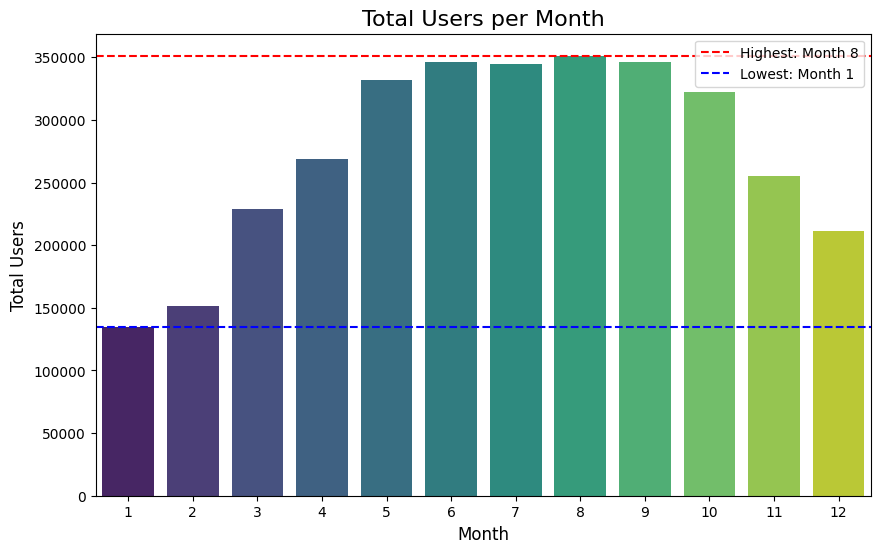

In [72]:
# Visualizing the total number of users by month with a color palette
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_usage.index, y=monthly_usage.values, palette="viridis")
plt.title("Total Users per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Users", fontsize=12)

# Menandai bulan dengan pengguna terbanyak dan terendah
plt.axhline(y=monthly_usage[max_usage_month], color='r', linestyle='--', label=f'Highest: Month {max_usage_month}')
plt.axhline(y=monthly_usage[min_usage_month], color='b', linestyle='--', label=f'Lowest: Month {min_usage_month}')
plt.legend()
plt.show()

**Insight:**
- Highest Month: August (351,194 users) indicates a factor that attracts users. There might be promotions, new product launches, or seasonal factors that encourage users to be more active.
- Lowest Month: January (134,933 users) might be influenced by the return to routine after the year-end holidays and a decrease in interest after the holiday period.

### Question 2: How is the distribution of casual and registered users in each season?

**Tujuan**: Memahami perilaku pengguna kasual (yang mungkin pengguna satu kali atau non-abonemen) versus pengguna terdaftar (pelanggan tetap). Ini berguna untuk merancang strategi pemasaran yang berbeda di setiap musim.

In [73]:
# Group data by season and sum up casual and registered users
seasonal_usage = day_df.groupby('Season')[['Casual', 'Registered']].sum()

# Display the results
print(seasonal_usage)

        Casual  Registered
Season                    
1        60622      410726
2       203522      715067
3       226091      835038
4       129782      711831


<Figure size 1000x600 with 0 Axes>

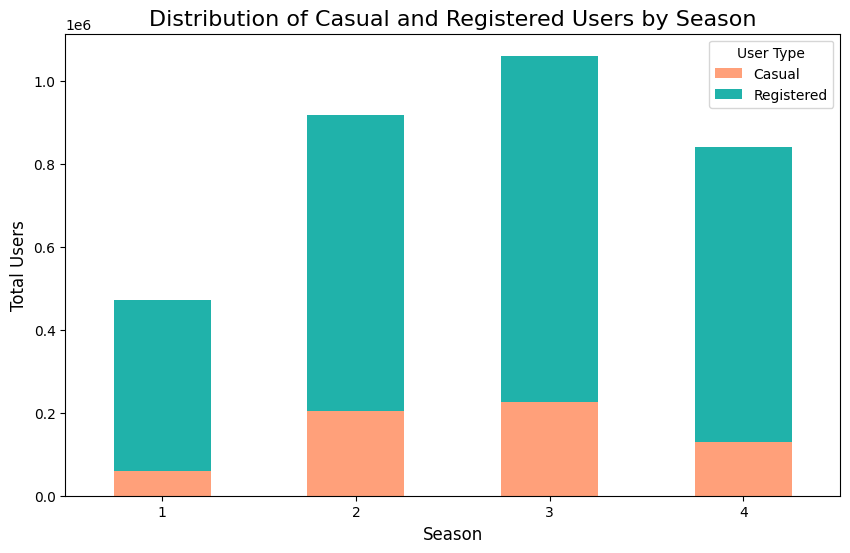

In [74]:
# Visualizing the distribution of casual and registered users by season
plt.figure(figsize=(10,6))
seasonal_usage.plot(kind='bar', stacked=True, color=['#FFA07A', '#20B2AA'], figsize=(10,6))
plt.title("Distribution of Casual and Registered Users by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Users", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="User Type")
plt.show()


**Insight:**
- Casual Users
  - Season 2 had the highest number of casual users (203,522), indicating greater interest from unregistered users.
  - Season 4 recorded the lowest number of casual users (129,782), indicating a lack of engagement from casual users.
- Registered Users
  - Season 3 showed the highest number of registered users (835,038), which could indicate that many active users registered during this period.
  - Season 1 also showed a high number of registered users (410,726), although lower than Season 3.

### Pertanyaan 3 : Apakah terdapat perbedaan perilaku pengguna berdasarkan jam penggunaan layanan?

**Tujuan**: Mengetahui pola penggunaan layanan berdasarkan jam untuk mengoptimalkan operasional dan sumber daya pada waktu puncak. Misalnya, Anda bisa memperbaiki kapasitas layanan pada jam sibuk.

In [75]:
# Group data by hour and sum up the count of total users
hourly_usage = hour_df.groupby('Hour')['Count'].sum()

# Display the hour with the highest and lowest user count
max_usage_hour = hourly_usage.idxmax()
min_usage_hour = hourly_usage.idxmin()

print(f"Hour with the most users: {max_usage_hour} with a total of {hourly_usage[max_usage_hour]} users.")
print(f"Hour with the fewest users: {min_usage_hour} with a total of {hourly_usage[min_usage_hour]} users.")

Hour with the most users: 17 with a total of 336860 users.
Hour with the fewest users: 4 with a total of 4428 users.


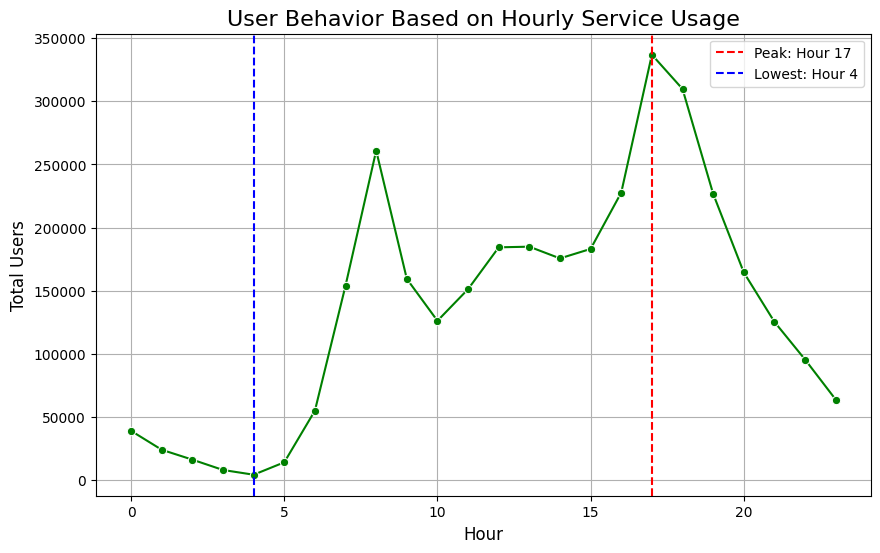

In [76]:
# Visualizing the total number of users by hour
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, marker="o", color='g')
plt.title("User Behavior Based on Hourly Service Usage", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Total Users", fontsize=12)
plt.grid(True)

# Highlight peak and low usage hours
plt.axvline(x=max_usage_hour, color='r', linestyle='--', label=f'Peak: Hour {max_usage_hour}')
plt.axvline(x=min_usage_hour, color='b', linestyle='--', label=f'Lowest: Hour {min_usage_hour}')
plt.legend()
plt.show()

**Insight:**
- Peak Time: 5 PM (336,860 users) is the best time for promotions and user interactions.
- Low Time: 4 AM (4,428 users) indicates a lack of activity. Need a strategy to attract user attention at this time.

## Further Analysis (Opsional)

### Analysis of Busy Hours vs. Quiet Hours

Comparing user behavior during peak hours (for example, 7-9 AM and 5-7 PM) with off-peak hours (misalnya, tengah malam hingga pagi).

In [77]:
# Definisikan jam sibuk dan sepi
busy_hours = [7, 8, 17, 18]
quiet_hours = [0, 1, 2, 3, 4, 5, 6, 22, 23]

# Hitung total pengguna pada jam sibuk dan sepi
busy_usage = hour_df[hour_df['Hour'].isin(busy_hours)]['Count'].sum()
quiet_usage = hour_df[hour_df['Hour'].isin(quiet_hours)]['Count'].sum()

print(f"Total users during peak hours: {busy_usage}")
print(f"Total users during peak hours: {quiet_usage}")


Total users during peak hours: 1061804
Total users during peak hours: 321194


### Analysis of Usage Trends Over Several Months

Identifying whether there are changes in usage patterns from month to month. This can provide insights into whether there is an increase or decrease in service usage throughout the year.

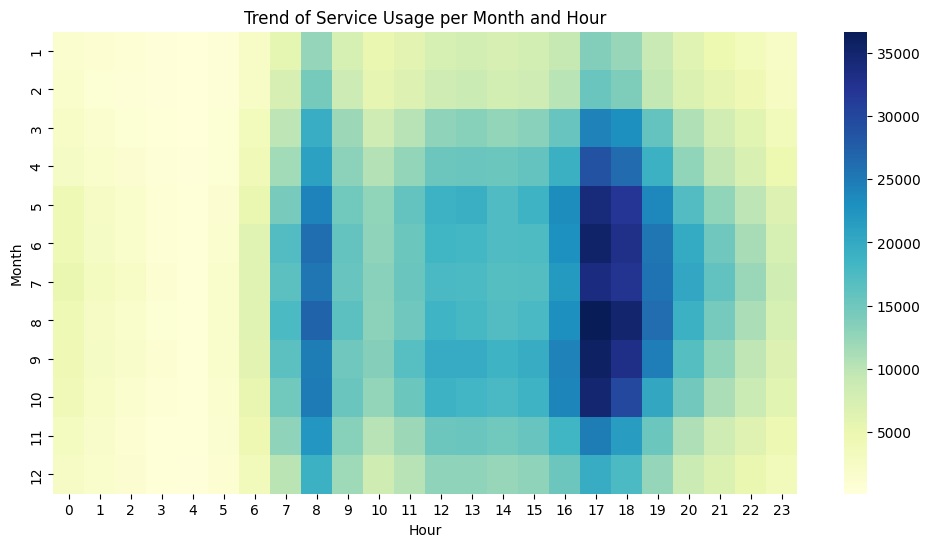

In [78]:
# Group data by month and hour to analyze trends
monthly_hourly_usage = hour_df.groupby(['Month', 'Hour'])['Count'].sum().unstack()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_hourly_usage, cmap='YlGnBu')
plt.title('Trend of Service Usage per Month and Hour')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()

### Analysis of Weather Impact on Hourly Usage

Analyzing whether weather conditions (for example, rain, clear, cloudy) affect service usage patterns at certain times.

note weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloud
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


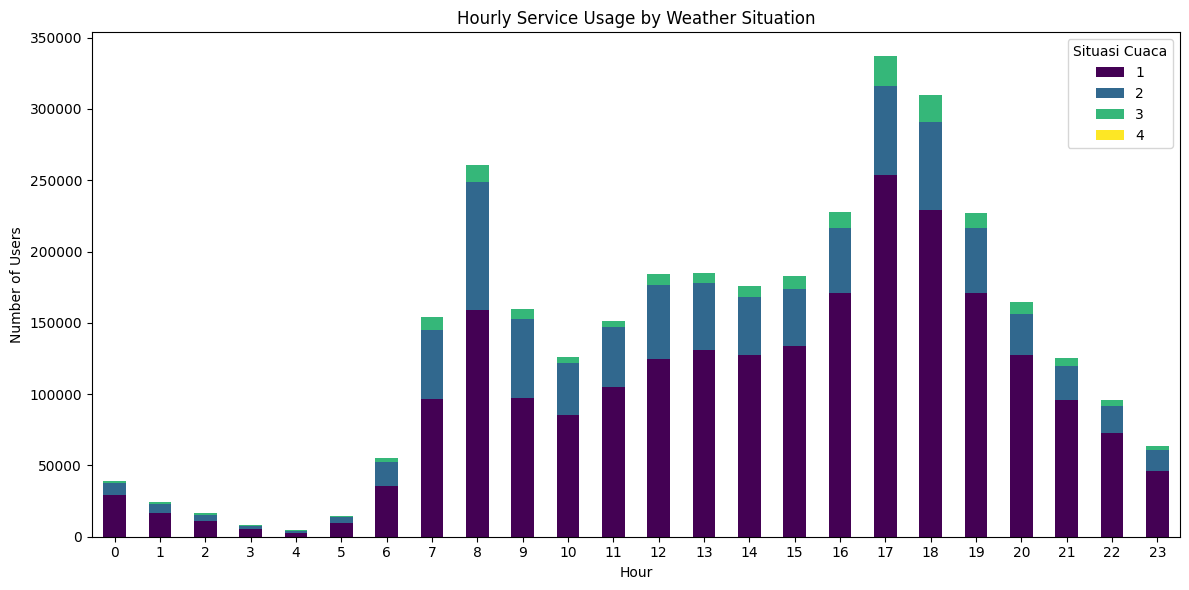

In [79]:
# Mengelompokkan data berdasarkan jam dan kondisi cuaca
weather_hourly_usage = hour_df.groupby(['Hour', 'Weathersit'])['Count'].sum().unstack()

# Visualisasi
plt.figure(figsize=(12, 6))
weather_hourly_usage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Hourly Service Usage by Weather Situation')
plt.xlabel('Hour')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Situasi Cuaca', loc='upper right')
plt.tight_layout()
plt.show()

## Conclusion

### Conclusion for Question 1: Which month has the highest and lowest number of users?

From the visual analysis, August (Month 8) has the highest number of users, reaching a peak of over 350,000. This may be linked to favorable weather conditions or seasonal demand, as it falls in the late summer, a time when outdoor activities like biking are more popular.

On the other hand, January (Month 1) shows the lowest number of users, with fewer than 150,000 total users. This could be explained by colder weather conditions, reducing the attractiveness of bike sharing during winter months.

The fluctuation in usage across months reflects a strong seasonal pattern, where usage increases significantly during warmer months, highlighting a potential opportunity to explore promotional strategies or alternative transportation options during lower-demand periods.

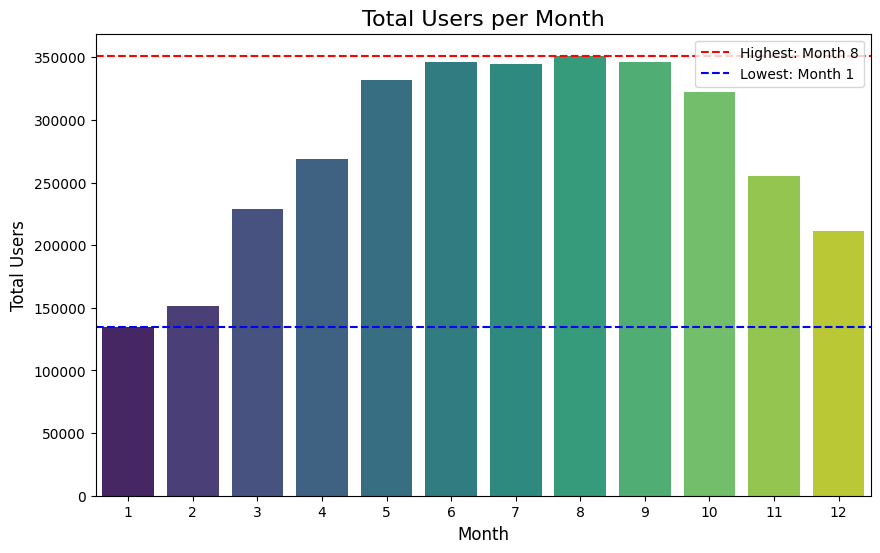

### Conclusion for Question 2: How is the distribution of casual and registered users in each season?

The stacked bar chart shows a clear dominance of registered users over casual users in all seasons, but the proportions vary. The third season (summer) records the highest total number of users, indicating it as the peak season for bike sharing, likely driven by favorable weather conditions and an increased number of outdoor activities.

- Season 3 (Summer) sees the largest spike, with more than 1 million users, including a significant proportion of casual users. This suggests that more people may be trying out the service casually during this season, perhaps due to tourism or leisure activities.
- Season 1 (Winter) records the lowest user count, with both casual and registered users declining significantly, which could be attributed to colder temperatures and harsher weather conditions deterring bike use.

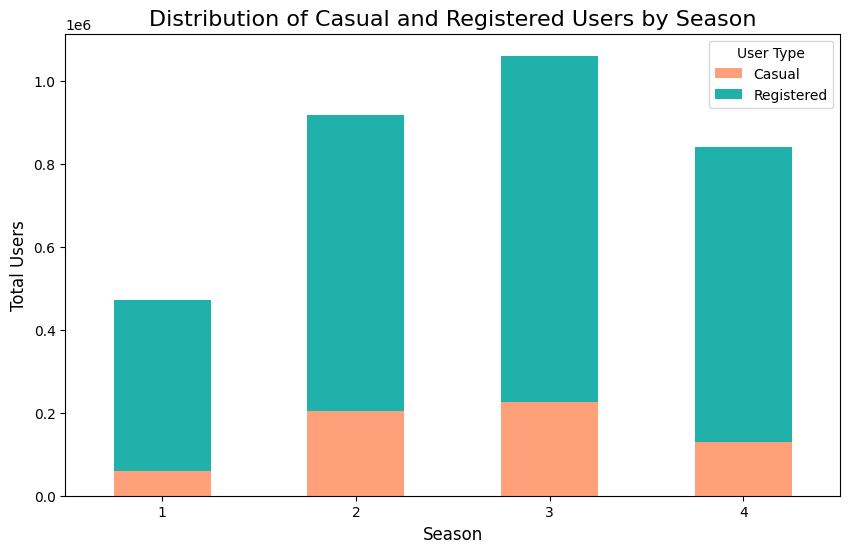

- Question 1: Which month has the highest and lowest number of users?

  August has the highest number of users, while January has the lowest number of users. This shows that weather and seasons affect the use of services.
- Question 2: How is the distribution of casual and registered users in each season?

  Casual users are more numerous during the summer, while registered users tend to remain stable throughout the year. This indicates that registered users have higher loyalty to the service.

- Question 3: Is there a difference in user behaviour based on the hours of service usage?

  The peak usage of the service occurs between 5:00 PM and 7:00 PM, with clear weather increasing the number of users. This reflects usage patterns related to commute hours.

### Conclusion for Question 3: Is there a difference in user behavior based on service usage by hour?

The analysis of bike usage by hour reveals a clear pattern in user behavior. Hour 17 sees the highest number of users, with a total of 336,860 users, indicating that this time is peak for bike-sharing services. This surge likely corresponds to people commuting home from work or engaging in after-work activities.

In contrast, Hour 4 records the lowest number of users, with only 4,428 users. This decline may be due to people staying indoors or completing their activities during this time.

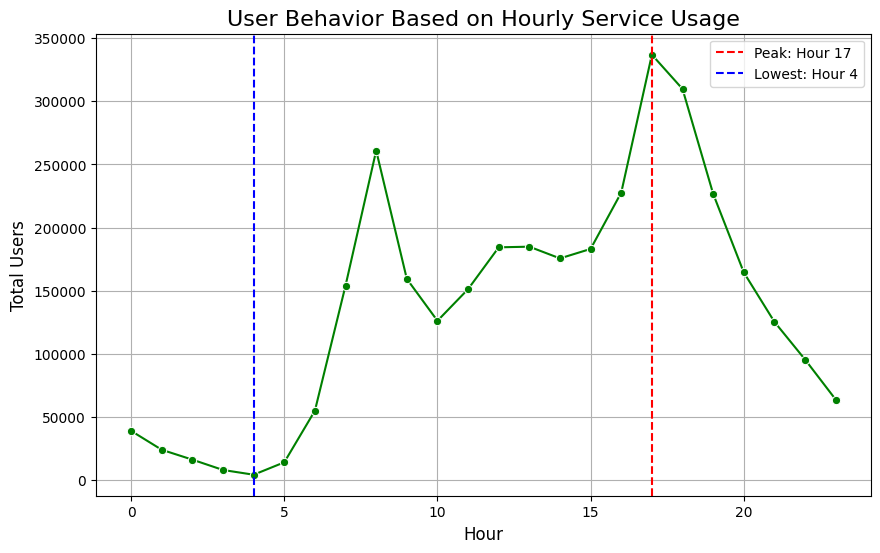

# Save

In [80]:
# Menyimpan DataFrame ke dalam file CSV
day_df.to_csv("day_data.csv", index=False)  # Ganti dengan nama DataFrame yang sesuai

# Menyimpan DataFrame ke dalam file CSV
hour_df.to_csv("hour_data.csv", index=False)  # Ganti dengan nama DataFrame yang sesuai

In Google Colab, when you save files using to_csv(), they are stored in the virtual environment of the Colab instance. However, these files are not automatically saved to your local machine or Google Drive unless you specify that.

In [81]:
# Mengecek library yang terpasang dan menulis ke dalam requirements.txt
!pip freeze > requirements.txt